In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [4]:
# Convert Python list to numpy.array
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

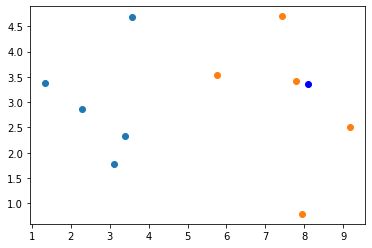

In [5]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])

# Decide which group the new point below belongs
x = np.array([8.093607318, 3.365731514])
plt.scatter(x[0], x[1], color='b')
plt.show()

## KNN:  K-Nearest Neighbors algorithm

In [6]:
from math import sqrt
# distances = []
# for point in X_train:
#     d = sqrt(np.sum((point - x) ** 2))
#     distances.append(d)
distances = [sqrt(np.sum((point - x) ** 2)) for point in X_train]
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [7]:
nearest = np.argsort(distances)

In [8]:
k = 6
k_nearest_point = [y_train[i] for i in nearest[:k]]
k_nearest_point

[1, 1, 1, 1, 1, 0]

In [9]:
from collections import Counter
votes = Counter(k_nearest_point)
votes

Counter({1: 5, 0: 1})

In [13]:
predict_y = votes.most_common(1)[0][0]
predict_y

1

In [26]:
# Extract the implementation above into a function
%run /Users/ada/Documents/coding-workspace/PycharmProjects/fun_machine_learning/KNN-simple.py

In [27]:
KNN_classify(6, X_train, y_train, x)

1

In [17]:
# Use KNN in scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [18]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 6)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [22]:
# Note that the input of predit() must be an array
# KNN_classifier.predict(x)
X_predict = x.reshape(1, -1)
KNN_classifier.predict(X_predict)

array([1])

In [25]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [39]:
# Imitate the source code of KNN in scikit-learn
%run /Users/ada/Documents/coding-workspace/PycharmProjects/fun_machine_learning/KNN.py

In [40]:
knn_clf = KNNClassifier(6)
knn_clf.fit(X_train, y_train)
knn_clf.predict(X_predict)

array([1])

## Use the idea of train-test-split to test the performance

In [41]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [42]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
# Because y (features) are sorted, we need to shuffle it to evenly get a part of it
shuffle_indexes = np.random.permutation(len(X))
shuffle_indexes

array([  6, 147,  31,  45, 146, 128, 124,   7,  81,  97, 136,  25,  21,
         9, 109,  43,  71,  57, 135,  20,  12,  29,  87, 126,  50,  11,
        40,   5, 122, 127, 117, 149,  96, 110, 104,  73,  76,  33,  70,
        36,  69, 137,  66, 114,   3,  84,  85, 107,  44,  27, 103,  89,
       105,  98, 131,  54,  14,  68,  77, 108,  78,  90,  64, 113,  23,
       141, 112, 101,  48,  32, 144,  86,  15,   8,   2,  51,  22,  56,
        52, 142,  61, 106,  60,  99,  49,  39,  92, 133, 145,  95,  82,
       143,  10,  16,  63,  65,  80, 111,  35,   0,  53,  24, 132,  47,
       129, 148,  17, 120, 100,  26,  93,  88,  34,  38, 139, 134,  13,
        94,  42, 116, 123,  55,  46, 121,  18,  75, 130,  62,  79, 102,
       119,  67,  28,  74,   1,  72,  58, 140,  41,   4,  30,  83,  91,
       118, 115,  37, 125, 138,  59,  19])

In [47]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)
test_indexes = shuffle_indices[:test_size]
train_indexes = shuffle_indices[test_size:]

X_train = X[train_indexes]
y_train = y[train_indexes]
X_test = X[test_indexes]
y_test = y[test_indexes]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


 ## Extrat part of code above into train_test_split

In [53]:
%run /Users/ada/Documents/coding-workspace/PycharmProjects/fun_machine_learning/model_selection.py

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [66]:
%run /Users/ada/Documents/coding-workspace/PycharmProjects/fun_machine_learning/KNN.py
my_knn_clf = KNNClassifier(3)
my_knn_clf.fit(X_train, y_train)
y_predict = my_knn_clf.predict(X_test)

In [70]:
sum(y_predict == y_test) / len(y_test)  # Accurate rate

0.9333333333333333

## Use train_test_split in sklearn

In [79]:
from sklearn.model_selection import train_test_split
# Note to set the seed for random to get a same result next time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 600)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

(120, 4) (120,)
(30, 4) (30,)


0.9666666666666667